# 1.1logistic regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Mathematically, logistic regression model is defined as: Y=B0+B1X1+B2X2+B3X3.....+e, where B0 is the intercept and B1,B2,B3... are the coefficientand e is the random error. 

The probability in a logistic regression curve: p=e^y/(1+e^y)
Where,‘e’ is a real number constant, the basic of natural logarithm and equals 2.7183
‘y’ is the response value for an observation.




In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

In [3]:
#reading the .csv data file
nephritis= pd.read_csv(r"C:\Users\mpkha\Desktop\VIT Course 2\project\nephritis.csv")

In [4]:
nephritis.head(10)

,tempreture,nausea,lumber_pain,urine_pushing,micturition,swelling_urethra,inflamation,nephdiagnosis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.1,no,no,yes,yes,yes,yes,no
4,36.1,no,yes,no,no,no,no,no
5,36.1,no,yes,no,no,no,no,no
6,36.2,no,no,yes,yes,yes,yes,no
7,36.2,no,yes,no,no,no,no,no
8,36.3,no,no,yes,yes,yes,yes,no
9,36.6,no,no,yes,yes,yes,yes,no


In [5]:
nephritis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
tempreture          120 non-null float64
nausea              120 non-null object
lumber_pain         120 non-null object
urine_pushing       120 non-null object
micturition         120 non-null object
swelling_urethra    120 non-null object
inflamation         120 non-null object
nephdiagnosis       120 non-null object
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


In [6]:
nephritis.columns #all the columns except temprature are in object format we have to convert it in numerical format

Index(['tempreture', 'nausea', 'lumber_pain', 'urine_pushing', 'micturition',
       'swelling_urethra', 'inflamation', 'nephdiagnosis'],
      dtype='object')

In [7]:
nephritis.shape

(120, 8)

In [8]:
nephritis["nausea"].value_counts()

no     91
yes    29
Name: nausea, dtype: int64

In [9]:
nephritis["nausea"].replace("yes",1,inplace=True)
nephritis["nausea"].replace("no",0,inplace=True)

In [10]:
nephritis["lumber_pain"].value_counts()

yes    70
no     50
Name: lumber_pain, dtype: int64

In [11]:
nephritis["lumber_pain"].replace("yes",1,inplace=True)
nephritis["lumber_pain"].replace("no",0,inplace=True)

In [12]:
nephritis["urine_pushing"].value_counts()

yes    80
no     40
Name: urine_pushing, dtype: int64

In [13]:
nephritis["urine_pushing"].replace("yes",1,inplace=True)
nephritis["urine_pushing"].replace("no",0,inplace=True)

In [14]:
nephritis["micturition"].value_counts()

no     61
yes    59
Name: micturition, dtype: int64

In [15]:
nephritis["micturition"].replace("yes",1,inplace=True)
nephritis["micturition"].replace("no",0,inplace=True)

In [16]:
nephritis["swelling_urethra"].value_counts()

no     70
yes    50
Name: swelling_urethra, dtype: int64

In [17]:
nephritis["swelling_urethra"].replace("yes",1,inplace=True)
nephritis["swelling_urethra"].replace("no",0,inplace=True)

In [18]:
nephritis["inflamation"].value_counts()

no     61
yes    59
Name: inflamation, dtype: int64

In [19]:
nephritis["inflamation"].replace("yes",1,inplace=True)
nephritis["inflamation"].replace("no",0,inplace=True)

In [20]:
nephritis["nephdiagnosis"].value_counts()

no     70
yes    50
Name: nephdiagnosis, dtype: int64

In [21]:
nephritis["nephdiagnosis"].replace("yes",1,inplace=True)
nephritis["nephdiagnosis"].replace("no",0,inplace=True)

In [22]:
nephritis.head(10)

,tempreture,nausea,lumber_pain,urine_pushing,micturition,swelling_urethra,inflamation,nephdiagnosis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.1,0,0,1,1,1,1,0
4,36.1,0,1,0,0,0,0,0
5,36.1,0,1,0,0,0,0,0
6,36.2,0,0,1,1,1,1,0
7,36.2,0,1,0,0,0,0,0
8,36.3,0,0,1,1,1,1,0
9,36.6,0,0,1,1,1,1,0


In [23]:
nephritis.info() # all values are in numeric format 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
tempreture          120 non-null float64
nausea              120 non-null int64
lumber_pain         120 non-null int64
urine_pushing       120 non-null int64
micturition         120 non-null int64
swelling_urethra    120 non-null int64
inflamation         120 non-null int64
nephdiagnosis       120 non-null int64
dtypes: float64(1), int64(7)
memory usage: 7.6 KB


In [24]:
nephritis.describe()

,tempreture,nausea,lumber_pain,urine_pushing,micturition,swelling_urethra,inflamation,nephdiagnosis
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,38.726667,0.241667,0.583333,0.666667,0.491667,0.416667,0.491667,0.416667
std,1.815421,0.429888,0.495074,0.473381,0.502027,0.495074,0.502027,0.495074
min,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.950000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,40.600000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
nephritis.isnull().sum()# chacking for null values
#no null values that means we can apply the model now
#as the data is in binary format there is know need of excuding an outlier as there is no outlier present 

tempreture          0
nausea              0
lumber_pain         0
urine_pushing       0
micturition         0
swelling_urethra    0
inflamation         0
nephdiagnosis       0
dtype: int64

In [26]:
X=nephritis.iloc[:,[0,1,2,3,4,5]]

In [27]:
Y=nephritis.iloc[:,[6]] #making a model on inflamtion
Y

,inflamation
0,0
1,1
2,0
3,1
4,0
...,...
115,0
116,0
117,0
118,0


In [28]:
Y1=nephritis.iloc[:,[7]] #making a model on diagnosis of nephritis
Y1

,nephdiagnosis
0,0
1,0
2,0
3,0
4,0
...,...
115,1
116,0
117,1
118,1


In [29]:
#splitting the dataset into train and test
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=2)

In [30]:
log1=LogisticRegression()

In [31]:
log1.fit(trainX,trainY) #fitting the first model

C:\Users\mpkha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mpkha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
log1.coef_

array([[-0.05932219,  0.8615321 , -2.06944052,  2.82838137,  2.1054909 ,
        -0.34994879]])

In [33]:
pred01=log1.predict_proba(testX) #predicting the probablity of X

In [34]:
pred01

array([[0.98401687, 0.01598313],
       [0.18820209, 0.81179791],
       [0.90015737, 0.09984263],
       [0.07156357, 0.92843643],
       [0.05419363, 0.94580637],
       [0.98245342, 0.01754658],
       [0.98363935, 0.01636065],
       [0.31995391, 0.68004609],
       [0.18193972, 0.81806028],
       [0.98325307, 0.01674693],
       [0.90637545, 0.09362455],
       [0.05328864, 0.94671136],
       [0.31225952, 0.68774048],
       [0.06809636, 0.93190364],
       [0.90015737, 0.09984263],
       [0.07156357, 0.92843643],
       [0.24864462, 0.75135538],
       [0.0703901 , 0.9296099 ],
       [0.24753802, 0.75246198],
       [0.31481311, 0.68518689],
       [0.98265678, 0.01734322],
       [0.07275508, 0.92724492],
       [0.84566517, 0.15433483],
       [0.05419363, 0.94580637],
       [0.30971728, 0.69028272],
       [0.98315511, 0.01684489],
       [0.07195873, 0.92804127],
       [0.237728  , 0.762272  ],
       [0.90587083, 0.09412917],
       [0.05152128, 0.94847872],
       [0.

# 1.2ROC Curve and AUC

ROC curve full form, which is Receiver Operating Characteristic curve. It is nothing but a graph displaying the performance of a classification model.By default, the logistic regression model assumes the classification threshold to be 0.5, but thresholds are completely problem dependent. In order to achieve the desired output, we can tune the threshold.ROC or Receiver Operating Characteristic plot is used to visualise the performance of a binary classifier. It gives us the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) at different classification thresholds.

True Positive Rate is the proportion of observations that are correctly predicted to be positive.
False Positive Rate is the proportion of observations that are incorrectly predicted to be positive.
An ROC curve of a perfect classifier is a combination of two straight lines both moving away from the baseline towards the top-left corner.
Although the theoretical range of the AUC ROC curve score is between 0 and 1, the actual scores of meaningful classifiers are greater than 0.5, which is the AUC ROC curve score of a random classifier.

In [35]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testY))]

In [36]:
#keeping probablities to posiitive outcome only
pred01 = pred01[:, 1]

In [37]:
#calculate scores
lr_auc = roc_auc_score(testY,pred01)
ns_auc = roc_auc_score(testY, ns_probs)

In [38]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


In [39]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testY, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testY,pred01)

<function matplotlib.pyplot.show(*args, **kw)>

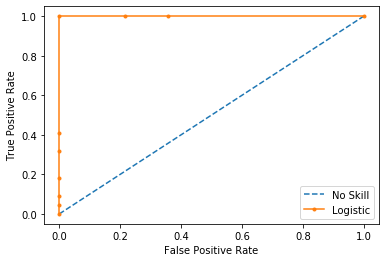

In [40]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show

In [41]:
pred02=log1.predict(X) # pedicting the values of x

In [42]:
pred02

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [43]:
nephritis["predict01"]=pred02

In [44]:
nephritis

,tempreture,nausea,lumber_pain,urine_pushing,micturition,swelling_urethra,inflamation,nephdiagnosis,predict01
0,35.5,0,1,0,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0,1
2,35.9,0,1,0,0,0,0,0,0
3,36.1,0,0,1,1,1,1,0,1
4,36.1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1,0
116,41.5,0,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1,0
118,41.5,0,1,1,0,1,0,1,0


In [45]:
CM=confusion_matrix(Y,pred02)

In [46]:
CM

array([[61,  0],
       [ 0, 59]], dtype=int64)

In [47]:
acc_log1=accuracy_score(pred02,Y)

In [48]:
print("Accuracy= ",accuracy_score(pred02,Y))# accuracy of inflamation

Accuracy=  1.0


In [49]:
trainX, testX, trainY1, testY1 = train_test_split(X, Y1, test_size=0.3, random_state=2)

In [50]:
log2=LogisticRegression()
log2.fit(trainX,trainY1)

C:\Users\mpkha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mpkha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
log2.coef_

array([[-0.08548232,  2.70073006,  2.81700965,  1.20664626, -0.22887056,
         1.35450463]])

In [52]:
pred01=log2.predict_proba(testX)
pred01

array([[0.72290628, 0.27709372],
       [0.08227386, 0.91772614],
       [0.98182987, 0.01817013],
       [0.80232856, 0.19767144],
       [0.94439916, 0.05560084],
       [0.69469298, 0.30530702],
       [0.71600507, 0.28399493],
       [0.93108522, 0.06891478],
       [0.07786729, 0.92213271],
       [0.70900117, 0.29099883],
       [0.98357223, 0.01642777],
       [0.94303713, 0.05696287],
       [0.92772055, 0.07227945],
       [0.78984276, 0.21015724],
       [0.98182987, 0.01817013],
       [0.80232856, 0.19767144],
       [0.02280287, 0.97719713],
       [0.79822983, 0.20177017],
       [0.02261316, 0.97738684],
       [0.92885861, 0.07114139],
       [0.69830693, 0.30169307],
       [0.80636423, 0.19363577],
       [0.17994137, 0.82005863],
       [0.94439916, 0.05560084],
       [0.92656573, 0.07343427],
       [0.70723437, 0.29276563],
       [0.80368079, 0.19631921],
       [0.0209738 , 0.9790262 ],
       [0.98343354, 0.01656646],
       [0.94021853, 0.05978147],
       [0.

In [53]:
pred01 = pred01[:, 1]

In [54]:
lr_auc = roc_auc_score(testY1,pred01)
ns_auc = roc_auc_score(testY1, ns_probs)

In [55]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


In [56]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testY1, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testY1,pred01)

<function matplotlib.pyplot.show(*args, **kw)>

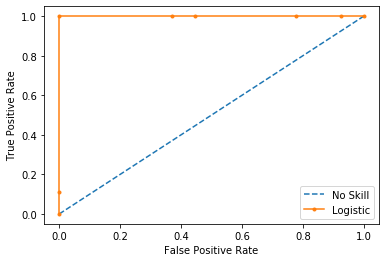

In [57]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show

In [58]:
pred02=log2.predict(X)
pred02

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [59]:
nephritis["predict02"]=pred02
nephritis

,tempreture,nausea,lumber_pain,urine_pushing,micturition,swelling_urethra,inflamation,nephdiagnosis,predict01,predict02
0,35.5,0,1,0,0,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0,1,0
2,35.9,0,1,0,0,0,0,0,0,0
3,36.1,0,0,1,1,1,1,0,1,0
4,36.1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1,0,1
118,41.5,0,1,1,0,1,0,1,0,1


In [60]:
CM2=confusion_matrix(Y1,pred02)
CM2

array([[70,  0],
       [ 0, 50]], dtype=int64)

In [61]:
acc_log2=accuracy_score(pred02,Y1)

In [62]:
print("Accuracy= ",accuracy_score(pred02,Y1))

Accuracy=  1.0



# 2.NB

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.
P(A|B)=(P(B|A)* P(A))/P(B)

Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

Gaussian Naive Bayes:
When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

Naive Bayes algorithm is mostly used in sentiment analysis, spam filtering, recommendation systems etc. They are fast and easy to implement but their biggest disadvantage is that the requirement of predictors to be independent. In most of the real life cases, the predictors are dependent, this hinders the performance of the classifier.

In [63]:
#normalising the data
#using (X-mean)/std

In [64]:
features = nephritis.columns[0:6]
cols= nephritis.columns
labels = cols[6]
print(features, "\n\n", labels)

Index(['tempreture', 'nausea', 'lumber_pain', 'urine_pushing', 'micturition',
       'swelling_urethra'],
      dtype='object') 

 inflamation


In [65]:
for feature in features:
    nephritis[feature] = (nephritis[features]- nephritis[features].mean()) / nephritis[features].std()

In [66]:
nephritis.head(10)

,tempreture,nausea,lumber_pain,urine_pushing,micturition,swelling_urethra,inflamation,nephdiagnosis,predict01,predict02
0,-1.777365,-1.777365,-1.777365,-1.777365,-1.777365,-1.777365,0,0,0,0
1,-1.557031,-1.557031,-1.557031,-1.557031,-1.557031,-1.557031,1,0,1,0
2,-1.557031,-1.557031,-1.557031,-1.557031,-1.557031,-1.557031,0,0,0,0
3,-1.446864,-1.446864,-1.446864,-1.446864,-1.446864,-1.446864,1,0,1,0
4,-1.446864,-1.446864,-1.446864,-1.446864,-1.446864,-1.446864,0,0,0,0
5,-1.446864,-1.446864,-1.446864,-1.446864,-1.446864,-1.446864,0,0,0,0
6,-1.391780,-1.391780,-1.391780,-1.391780,-1.391780,-1.391780,1,0,1,0
7,-1.391780,-1.391780,-1.391780,-1.391780,-1.391780,-1.391780,0,0,0,0
8,-1.336696,-1.336696,-1.336696,-1.336696,-1.336696,-1.336696,1,0,1,0
9,-1.171445,-1.171445,-1.171445,-1.171445,-1.171445,-1.171445,1,0,1,0


In [67]:
#splitting the data
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3)

In [68]:
#fitting the model
model01= GaussianNB()
model01.fit(X_train,Y_train)

C:\Users\mpkha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [69]:
pred01=model01.predict(X_train)
pred01

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [70]:
#calculating the accuracy of the  training model
print("Accuracy= ",accuracy_score(pred01,Y_train))

Accuracy=  0.7857142857142857


In [71]:
pred02=model01.predict(X_test)
pred02

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [72]:
#printing accuracy of the testing model
print("Accuracy= ",accuracy_score(pred02,Y_test))

Accuracy=  0.9166666666666666


In [73]:
pred03=model01.predict(X)
pred03

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [74]:
acc_NB1=accuracy_score(pred03,Y)

In [75]:
# accuracy of the entire data set
print("Accuracy= ",accuracy_score(pred03,Y))

Accuracy=  0.825


the accuracy of inflamation is 82.5%

In [76]:
#splitting the dataset for nephdiagnosis
X_train,X_test,Y1_train,Y1_test= train_test_split(X,Y1,test_size=0.3)

In [77]:
model02= GaussianNB()
model02.fit(X_train,Y1_train)

C:\Users\mpkha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [78]:
pred01=model02.predict(X_train)
pred01

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [79]:
print("Accuracy= ",accuracy_score(pred01,Y1_train))

Accuracy=  0.9761904761904762


In [80]:
pred02=model02.predict(X_test)
pred02

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [81]:
print("Accuracy= ",accuracy_score(pred02,Y1_test))

Accuracy=  0.9722222222222222


In [82]:
pred03=model02.predict(X)
pred03

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [83]:
acc_NB2=accuracy_score(pred03,Y1)

In [84]:
print("Accuracy= ",accuracy_score(pred03,Y1))

Accuracy=  0.975


# 3. Decision Tree

In [85]:
data= pd.read_csv(r"C:\Users\mpkha\Desktop\VIT Course 2\project\nephritis.csv")
data.describe

<bound method NDFrame.describe of      tempreture nausea lumber_pain urine_pushing micturition swelling_urethra  \
0          35.5     no         yes            no          no               no   
1          35.9     no          no           yes         yes              yes   
2          35.9     no         yes            no          no               no   
3          36.1     no          no           yes         yes              yes   
4          36.1     no         yes            no          no               no   
..          ...    ...         ...           ...         ...              ...   
115        41.4     no         yes           yes          no              yes   
116        41.5     no          no            no          no               no   
117        41.5    yes         yes            no         yes               no   
118        41.5     no         yes           yes          no              yes   
119        41.5     no         yes           yes          no              y

In [86]:
data.isnull().sum() # Checking for null values

tempreture          0
nausea              0
lumber_pain         0
urine_pushing       0
micturition         0
swelling_urethra    0
inflamation         0
nephdiagnosis       0
dtype: int64

In [87]:
colnames = list(data.columns)

In [88]:
colnames #Getting column names

['tempreture',
 'nausea',
 'lumber_pain',
 'urine_pushing',
 'micturition',
 'swelling_urethra',
 'inflamation',
 'nephdiagnosis']

In [89]:
Predictors = colnames[0:7]
target = colnames[7]

In [90]:
Predictors

['tempreture',
 'nausea',
 'lumber_pain',
 'urine_pushing',
 'micturition',
 'swelling_urethra',
 'inflamation']

In [91]:
data['nausea'].value_counts()

no     91
yes    29
Name: nausea, dtype: int64

In [92]:
# Converting into numeric arrays
data['nausea'].replace('yes',1,inplace=True)
data['nausea'].replace('no',0,inplace=True)

In [93]:
data['lumber_pain'].replace('yes',1,inplace=True) 
data['lumber_pain'].replace('no',0,inplace=True)

In [94]:
data['urine_pushing'].replace('yes',1,inplace=True) 
data['urine_pushing'].replace('no',0,inplace=True)

In [95]:
data['micturition'].replace('yes',1,inplace=True) 
data['micturition'].replace('no',0,inplace=True)

In [96]:
data['swelling_urethra'].replace('yes',1,inplace=True) 
data['swelling_urethra'].replace('no',0,inplace=True)

In [97]:
data['inflamation'].replace('yes',1,inplace=True) 
data['inflamation'].replace('no',0,inplace=True)

In [98]:
data['nephdiagnosis'].replace('yes',1,inplace=True) 
data['nephdiagnosis'].replace('no',0,inplace=True)

In [99]:
#the dataset is small so we are excluding the preprocessing of the data

In [100]:
data.describe()

,tempreture,nausea,lumber_pain,urine_pushing,micturition,swelling_urethra,inflamation,nephdiagnosis
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,38.726667,0.241667,0.583333,0.666667,0.491667,0.416667,0.491667,0.416667
std,1.815421,0.429888,0.495074,0.473381,0.502027,0.495074,0.502027,0.495074
min,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.950000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,40.600000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
Predictors = colnames[0:6] 
target = colnames[6]
data.describe()

,tempreture,nausea,lumber_pain,urine_pushing,micturition,swelling_urethra,inflamation,nephdiagnosis
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,38.726667,0.241667,0.583333,0.666667,0.491667,0.416667,0.491667,0.416667
std,1.815421,0.429888,0.495074,0.473381,0.502027,0.495074,0.502027,0.495074
min,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.950000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,40.600000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
train, test = train_test_split(data, test_size= 0.5)

In [103]:
model01 =  DecisionTreeClassifier(criterion="entropy")

In [104]:
model01.fit(train[Predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [105]:
pred01 = model01.predict(test[Predictors])
pd.crosstab(test[target], pred01)

col_0,0,1
inflamation,,
0,29,0
1,0,31


In [106]:
acc_decisiontree1 = (32+28)/(32+28)
acc_decisiontree1

1.0

PEARSONS'S CORRELATION COEFFICIENT

Since we got the accuracy rate 100%, determining the Pearson's correlation coefficient of our y variable with every x variable in order to find the correlation between the variables, just to check if the data is overfitted due to manual errors or because of the nature of the data itself.

For more information, refer to link: https://www.geeksforgeeks.org/python-pearson-correlation-test-between-two-variables/



In [107]:
from scipy.stats import pearsonr 

In [108]:
list = data['inflamation']
list1 = data['lumber_pain']
list2 = data['nausea']
list3= data['tempreture']
list4= data['urine_pushing']
list5= data['micturition']
list6= data['swelling_urethra']

In [109]:
corr, _ = pearsonr(list,list1)
print('Pearsons correlation : %3.f' % corr)
corr, _ = pearsonr(list,list2)
print('Pearsons correlation : %3.f' % corr)
corr, _ = pearsonr(list,list3)
print('Pearsons correlation : %3.f' % corr)
corr, _ = pearsonr(list,list4)
print('Pearsons correlation : %3.f' % corr)
corr, _ = pearsonr(list,list5)
print('Pearsons correlation : %3.f' % corr)
corr, _ = pearsonr(list,list6)
print('Pearsons correlation : %3.f' % corr)

Pearsons correlation :  -1
Pearsons correlation :   0
Pearsons correlation :  -0
Pearsons correlation :   1
Pearsons correlation :   1
Pearsons correlation :   0


** DETERMINING WHETHER TO USE MULTIPLE CORRESPONDENCE ANALYSIS**

In order to use MCA, a big data with multiple variables and high correlations amongst many variables is required, this method is usually used to reduce and fix unnecessary correlations, in order to improve the accuracy of the model, but since both models already have an accuracy of 1, this model can only be used to reduce the dimensions of the data. Here, it has not been used due to absence of complexity and size of data hence proving that the accuracy is not due to overfitting but due to the nature of the data.

For more information, refer to link: https://pypi.org/project/mca/

** MODEL FOR DIAGNOSIS OF NEPHRITIS**

In [110]:
data['nephdiagnosis'].value_counts()

0    70
1    50
Name: nephdiagnosis, dtype: int64

In [111]:
Predictors = colnames[0:6] 
target = colnames[7]
target

'nephdiagnosis'

In [112]:
train, test = train_test_split(data, test_size= 0.5)
model02 =  DecisionTreeClassifier(criterion="entropy")
model02.fit(train[Predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [113]:
pred02 = model02.predict(test[Predictors])
pd.crosstab(test[target], pred02)

col_0,0,1
nephdiagnosis,,
0,36,0
1,0,24


In [114]:
acc_decisiontree2 = (36+24)/(36+24)
acc_decisiontree2

1.0

In [115]:
list = data['nephdiagnosis']

In [116]:
corr, _ = pearsonr(list,list1)
print('Pearsons correlation : %3.f' % corr)
corr, _ = pearsonr(list,list2)
print('Pearsons correlation : %3.f' % corr)
corr, _ = pearsonr(list,list3)
print('Pearsons correlation : %3.f' % corr)
corr, _ = pearsonr(list,list4)
print('Pearsons correlation : %3.f' % corr)
corr, _ = pearsonr(list,list5)
print('Pearsons correlation : %3.f' % corr)
corr, _ = pearsonr(list,list6)
print('Pearsons correlation : %3.f' % corr)

Pearsons correlation :   1
Pearsons correlation :   1
Pearsons correlation :   1
Pearsons correlation :   0
Pearsons correlation :   0
Pearsons correlation :   0


In case of a suitable data with great complexity and a large number of variables, the following libraries can be used to fix the problem of correlation between the MULTINOMIAL VARIABLES

For more information, refer to link: https://www.mcliston.com/third-post.html

!pip show prince
!pip install import prince
mca = prince.MCA(n_components = 2, random_state = 42, n_iter=15)

mca = mca.fit(multinomial.csv)

# 4.SVM

INTRODUCTION

Here we have implemented the support vector machine in order to fit our data into an accurate result-giving model and have implemented techniques of ridge, lasso and elastic net regressions in order to check if the accuracy of the model can be enhanced.

In [117]:
# Importing all required libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score # score evaluate
from sklearn.model_selection import cross_val_predict 
%matplotlib inline

In [118]:
data.describe()

,tempreture,nausea,lumber_pain,urine_pushing,micturition,swelling_urethra,inflamation,nephdiagnosis
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,38.726667,0.241667,0.583333,0.666667,0.491667,0.416667,0.491667,0.416667
std,1.815421,0.429888,0.495074,0.473381,0.502027,0.495074,0.502027,0.495074
min,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.950000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,40.600000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


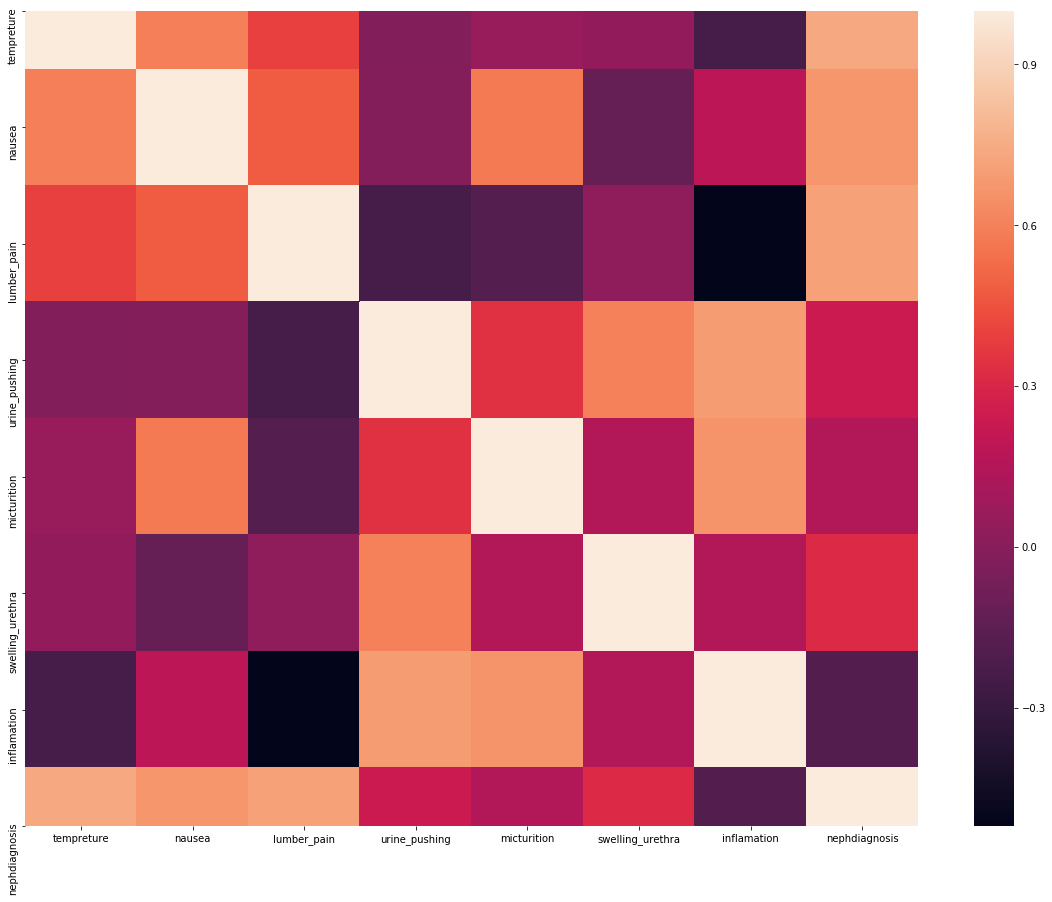

In [119]:
plt.subplots(figsize=(20,15)) # Plotting heatmap
sns.heatmap(data.corr())

In [120]:
from sklearn.svm import SVC

In [121]:
data.describe

<bound method NDFrame.describe of      tempreture  nausea  lumber_pain  urine_pushing  micturition  \
0          35.5       0            1              0            0   
1          35.9       0            0              1            1   
2          35.9       0            1              0            0   
3          36.1       0            0              1            1   
4          36.1       0            1              0            0   
..          ...     ...          ...            ...          ...   
115        41.4       0            1              1            0   
116        41.5       0            0              0            0   
117        41.5       1            1              0            1   
118        41.5       0            1              1            0   
119        41.5       0            1              1            0   

     swelling_urethra  inflamation  nephdiagnosis  
0                   0            0              0  
1                   1            1           

In [122]:
features=data.drop("inflamation", axis=1)
features=data.drop("nephdiagnosis", axis=1)
target = data["inflamation"]


In [123]:
X_train,X_test, Y_train, Y_test = train_test_split(features,target, test_size=0.3, random_state = 5) 
print(X_train.shape," \n\n\n", X_test.shape)

(84, 7)  


 (36, 7)


In [124]:
model01 = SVC()
model01.fit(X_train,Y_train)
pred01 = model01.predict(X_train)
accuracy_score(Y_train,pred01)

C:\Users\mpkha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

In [125]:
confusion_matrix(Y_train,pred01)

array([[47,  0],
       [ 0, 37]], dtype=int64)

In [126]:
pd.crosstab(Y_train,pred01)

col_0,0,1
inflamation,,
0,47,0
1,0,37


In [127]:
X_train.shape

(84, 7)

In [128]:
acc_svm1 = (0+37)/84
acc_svm1

0.44047619047619047

In [129]:
#Ridge regression

TRYING RIDGE REGRESSION

Refer to links:https://www.geeksforgeeks.org/implementation-of-lasso-ridge-and-elastic-net/

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

In [131]:
parameters = {'alpha': [1000,2000,3000,4000,5000]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(features,target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1000, 2000, 3000, 4000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [132]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1000}
-0.23411951029668657


Questions about negative error:

https://github.com/scikit-learn/scikit-learn/issues/2439

IMPLEMENTING LASSO REGRESSION

In [133]:
# TRYING lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()

In [134]:
parameters = {'alpha': [1000,2000,3000,4000,5000]}
lasso_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(features,target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1000, 2000, 3000, 4000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [135]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1000}
-0.23411951029668657


In [136]:
# implementing lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(normalize = True)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [137]:
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred+1)- np.log10(y_true+1).mean**0.5)
    score = 1- error
    return score

In [138]:
#Predicting for X_test
y_pred_lass = lasso_reg.predict(X_test)


In [139]:
y_pred_lass

array([0.44047619, 0.44047619, 0.44047619, 0.44047619, 0.44047619,
       0.44047619, 0.44047619, 0.44047619, 0.44047619, 0.44047619,
       0.44047619, 0.44047619, 0.44047619, 0.44047619, 0.44047619,
       0.44047619, 0.44047619, 0.44047619, 0.44047619, 0.44047619,
       0.44047619, 0.44047619, 0.44047619, 0.44047619, 0.44047619,
       0.44047619, 0.44047619, 0.44047619, 0.44047619, 0.44047619,
       0.44047619, 0.44047619, 0.44047619, 0.44047619, 0.44047619,
       0.44047619])

IMPLEMENTING ELASTIC REGRESSION Refer to link: https://www.hindawi.com/journals/aaa/2014/569501/

In [140]:
from sklearn.linear_model import ElasticNet
e_net = ElasticNet(alpha =1)
e_net.fit(X_train,Y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [141]:
y_pred_elastic= e_net.predict(X_test)
mean_squared_error =np.mean((y_pred_elastic - Y_test)**2)
print("MSE:",mean_squared_error)

MSE: 0.26677059712774004


MODEL OF NEPHRITIS

In [142]:
target = data['nephdiagnosis']

In [143]:
X_train,X_test, Y_train, Y_test = train_test_split(features,target, test_size=0.3, random_state = 5) 
print(X_train.shape," \n\n\n", X_test.shape)

(84, 7)  


 (36, 7)


In [144]:
model01 = SVC()
model01.fit(X_train,Y_train)
pred01 = model01.predict(X_train)

C:\Users\mpkha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [145]:
accuracy_score(Y_train,pred01)

1.0

In [146]:
confusion_matrix(Y_train,pred01)

array([[51,  0],
       [ 0, 33]], dtype=int64)

In [147]:
pd.crosstab(Y_train,pred01)

col_0,0,1
nephdiagnosis,,
0,51,0
1,0,33


In [148]:
pd.crosstab(Y_train,pred01)

col_0,0,1
nephdiagnosis,,
0,51,0
1,0,33


In [149]:
X_train.shape

(84, 7)

In [150]:
acc_svm2 = (33)/84
acc_svm2

0.39285714285714285

In [151]:
# ridge regression since libraries are already imported not importing them again

IMPLEMENTING RIDGE REGRESSION

Refer to links:https://www.geeksforgeeks.org/implementation-of-lasso-ridge-and-elastic-net/

In [152]:
parameters = {'alpha': [1000,2000,3000,4000,5000]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(features,target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1000, 2000, 3000, 4000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [153]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1000}
-0.23411951029668657


IMPLEMENTING LASSO REGRESSION

In [154]:
# implementing lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(normalize = True)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [155]:
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred+1)- np.log10(y_true+1).mean**0.5)
    score = 1- error
    return score

In [156]:
#Predicting for X_test
y_pred_lass = lasso_reg.predict(X_test)

In [157]:
y_pred_lass

array([0.39285714, 0.39285714, 0.39285714, 0.39285714, 0.39285714,
       0.39285714, 0.39285714, 0.39285714, 0.39285714, 0.39285714,
       0.39285714, 0.39285714, 0.39285714, 0.39285714, 0.39285714,
       0.39285714, 0.39285714, 0.39285714, 0.39285714, 0.39285714,
       0.39285714, 0.39285714, 0.39285714, 0.39285714, 0.39285714,
       0.39285714, 0.39285714, 0.39285714, 0.39285714, 0.39285714,
       0.39285714, 0.39285714, 0.39285714, 0.39285714, 0.39285714,
       0.39285714])

IMPLEMENTING ELASTIC NET REGRESSION Refer to link: https://www.hindawi.com/journals/aaa/2014/569501/

In [158]:
from sklearn.linear_model import ElasticNet
e_net = ElasticNet(alpha =1)
e_net.fit(X_train,Y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [159]:
y_pred_elastic= e_net.predict(X_test)
mean_squared_error =np.mean((y_pred_elastic - Y_test)**2)
print("MSE:",mean_squared_error)

MSE: 0.2090390917169684


# 5. KNN

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set.

The following are some of the areas in which KNN can be applied successfully − 1)Banking System KNN can be used in banking system to predict weather an individual is fit for loan approval? Does that individual have the characteristics similar to the defaulters one? 2)Calculating Credit Ratings KNN algorithms can be used to find an individual’s credit rating by comparing with the persons having similar traits. 3)Politics With the help of KNN algorithms, we can classify a potential voter into various classes like “Will Vote”, “Will not Vote”, “Will Vote to Party ‘ABC’, “Will Vote to Party ‘XYZ’.

In [160]:
from sklearn.neighbors import KNeighborsClassifier as KNC #importing KNC library for KNN Algorithm

In [161]:
#Taking the initial rows from the dataset
data.head()

,tempreture,nausea,lumber_pain,urine_pushing,micturition,swelling_urethra,inflamation,nephdiagnosis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.1,0,0,1,1,1,1,0
4,36.1,0,1,0,0,0,0,0


In [162]:
#Getting info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
tempreture          120 non-null float64
nausea              120 non-null int64
lumber_pain         120 non-null int64
urine_pushing       120 non-null int64
micturition         120 non-null int64
swelling_urethra    120 non-null int64
inflamation         120 non-null int64
nephdiagnosis       120 non-null int64
dtypes: float64(1), int64(7)
memory usage: 7.6 KB


In [163]:
#Getting the total entries of the dataset
data.shape

(120, 8)

In [164]:
#The last entries of the dataset
data.tail()

,tempreture,nausea,lumber_pain,urine_pushing,micturition,swelling_urethra,inflamation,nephdiagnosis
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1
119,41.5,0,1,1,0,1,0,1


In [165]:
#Splitting the data into train and test with test size 0.3
train, test = train_test_split(data,test_size=0.3)

In [166]:
#Dropping the dependent variables for evaluation and storing in 1 column
trainX  = train.drop(["inflamation"],axis=1)
trainX  = train.drop(["nephdiagnosis"],axis=1)
trainY = train["inflamation"]

testX = test.drop(["inflamation"], axis=1)
testX = test.drop(["nephdiagnosis"], axis=1)
testY = test["inflamation"]

trainX1  = train.drop(["inflamation"],axis=1)
trainX1  = train.drop(["nephdiagnosis"],axis=1)
trainY1 = train["nephdiagnosis"]

testX1 = test.drop(["inflamation"], axis=1)
testX1 = test.drop(["nephdiagnosis"], axis=1)
testY1 = test["nephdiagnosis"]

In [167]:
#Building and fitting the model for KNN for inflamation
model01 = KNC (n_neighbors=3)
model01.fit(trainX,trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [168]:
#Predicting the model
pred01= model01.predict(trainX)

In [169]:
#Taking the average of prediction
train_acc = np.mean(pred01 == trainY)

In [170]:
#Checking the accuracy, here the accuracy is 1 because of the dataset being small
train_acc

1.0

In [171]:
#predicting for testing dataset
pred02 = model01.predict(testX)
test_acc = np.mean(pred02== testY)
test_acc

1.0

In [172]:
#Similarly doing the prediction and model fitting with changed K value
model02 = KNC (n_neighbors = 5)
model02.fit(trainX,trainY)
pred03= model02.predict(trainX)
train_acc = np.mean(pred03 == trainY)
pred04 = model02.predict(testX)
test_acc = np.mean(pred04== testY)

print(train_acc,"\n",test_acc)
acc_KNN1= (train_acc+test_acc)/2
acc_KNN1

1.0 
 1.0


1.0

In [173]:
#Creating a list for storing accuracy
acc=[]
for i in range(3,20,2):
    model = KNC(n_neighbors=i)
    model.fit(trainX, trainY)
    train_acc = np.mean(pred03 == trainY)
    test_acc = np.mean(pred04== testY)
    acc.append([train_acc, test_acc]) #appending the training and testing accuracy

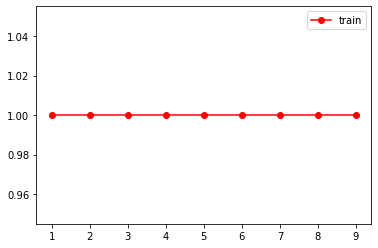

In [174]:
#plotting the graph of training accuracy
plt.plot(np.arange(1,10,1),[i[0] for i in acc], "ro-")
plt.legend(["train", "test"])

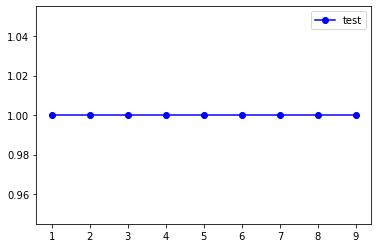

In [175]:
#plotting the graph of testing accuracy
plt.plot(np.arange(1,10,1),[i[1] for i in acc], "bo-")
plt.legend(["test", "train"])

In [176]:
#Similarly building and fitting the model for KNN for Nephdiagnosis
model01 = KNC (n_neighbors=1)
model01.fit(testX1,testY1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [177]:
#predicting model for nephdiagnosis
pred01= model01.predict(trainX1)

In [178]:
#Following the same procedure for finding the accuracy in case of Nephdiagnosis
train_acc = np.mean(pred01 == trainY1)

In [179]:
#Training accuracy of model for Nephdiagnosis
train_acc

1.0

In [180]:
pred02 = model01.predict(testX1)
test_acc = np.mean(pred02== testY1)
test_acc

1.0

In [181]:
model02 = KNC (n_neighbors = 5)
model02.fit(trainX1,trainY1)
pred03= model02.predict(trainX1)
train_acc = np.mean(pred03 == trainY1)
pred04 = model02.predict(testX1)
test_acc = np.mean(pred04== testY1)

print(train_acc, " \n \n" ,test_acc)
acc_KNN2=(train_acc+test_acc)/2
acc_KNN2

1.0  
 
 1.0


1.0

In [182]:
acc=[]
for i in range(2,20,2):
    model = KNC(n_neighbors=i)
    model.fit(trainX1, trainY1)
    train_acc = np.mean(pred03 == trainY1)
    test_acc = np.mean(pred04== testY1)
    acc.append([train_acc, test_acc])

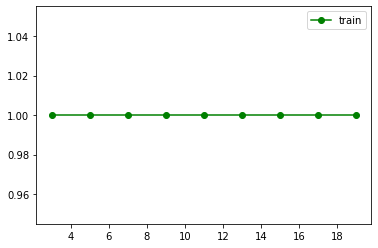

In [183]:
plt.plot(np.arange(3,20,2),[i[0] for i in acc], "go-")
plt.legend(["train", "test"])

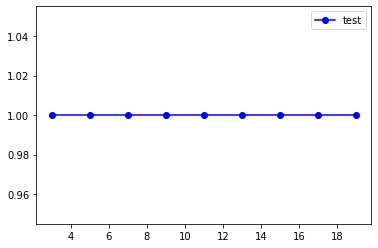

In [184]:
plt.plot(np.arange(3,20,2),[i[1] for i in acc], "bo-")
plt.legend(["test", "train"])

# Model assesment

In [185]:
models_inflamtion= pd.DataFrame({ 
"Model" : ["Logistic Regression", "Naive Bayes", "Decision Tree", "Support Vector Machine" , "KNN"],
"FullScore" : [acc_log1,acc_NB1,acc_decisiontree1,acc_svm1,acc_KNN1]
})

In [186]:
models_inflamtion.head()

,Model,FullScore
0,Logistic Regression,1.000000
1,Naive Bayes,0.825000
2,Decision Tree,1.000000
3,Support Vector Machine,0.440476
4,KNN,1.000000


In [187]:
#here we will select the model having the highest accuracy for inflamtion
#i.e we can choose any model between LR,DT,KNN
#LR being more precise with ROC and AUC we will consider LR
#SVM has the lowest accuracy

In [188]:
models_nephdiagnosis= pd.DataFrame({ 
"Model" : ["Logistic Regression", "Naive Bayes", "Decision Tree", "Support Vector Machine" , "KNN"],
"FullScore" : [acc_log2,acc_NB2,acc_decisiontree2,acc_svm2,acc_KNN2]
})

In [189]:
models_nephdiagnosis.head()

,Model,FullScore
0,Logistic Regression,1.000000
1,Naive Bayes,0.975000
2,Decision Tree,1.000000
3,Support Vector Machine,0.392857
4,KNN,1.000000


In [190]:
#model assesment for diagnosis of nephritis